In [1]:
import pandas as pd
import libcirctis

result_file = 'outputs/06_1.tsv'

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
df_eval = pd.read_csv(result_file, sep='\t')

In [3]:
# CV means ordered
df_eval_cv = df_eval.groupby('degree').mean()
df_eval_cv = df_eval_cv.sort_values('F1-score', ascending=False)
df_eval_cv

,fold,up_size,down_size,C1,C2,TP,FP,FN,TN,F1-score,AUPR,Precision,Recall,Specificity,Accuracy,AUROC,n_train,n_train_pos,n_train_neg,n_test,n_test_pos,n_test_neg,sample_size,train_time,pred_time
degree,,,,,,,,,,,,,,,,,,,,,,,,,
203,1,100,103,1.0,1.0,881,679,113,65481,0.689898,0.879865,0.564744,0.886318,0.989737,0.988206,0.986302,7648,3824,3824,67154,994,66160,203,215.402666,6.346278
202,1,100,103,1.0,1.0,881,682,113,65478,0.689089,0.881255,0.563660,0.886318,0.989692,0.988162,0.986306,7648,3824,3824,67154,994,66160,203,220.716865,6.306240
201,1,100,103,1.0,1.0,881,686,113,65474,0.688012,0.880362,0.562221,0.886318,0.989631,0.988102,0.986305,7648,3824,3824,67154,994,66160,203,216.434240,6.186481
200,1,100,103,1.0,1.0,881,691,113,65469,0.686672,0.881141,0.560433,0.886318,0.989556,0.988028,0.986308,7648,3824,3824,67154,994,66160,203,219.100290,6.876172
199,1,100,103,1.0,1.0,882,694,112,65466,0.686381,0.878106,0.559645,0.887324,0.989510,0.987998,0.986306,7648,3824,3824,67154,994,66160,203,216.664983,6.390199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,1,100,103,1.0,1.0,929,7558,65,58602,0.195971,0.404391,0.109462,0.934608,0.885762,0.886485,0.971109,7648,3824,3824,67154,994,66160,203,72.960998,2.054035
4,1,100,103,1.0,1.0,922,8066,72,58094,0.184733,0.351954,0.102581,0.927565,0.878083,0.878816,0.966658,7648,3824,3824,67154,994,66160,203,54.611260,1.635848
3,1,100,103,1.0,1.0,917,8767,77,57393,0.171755,0.303270,0.094692,0.922535,0.867488,0.868303,0.960533,7648,3824,3824,67154,994,66160,203,51.099808,1.707813


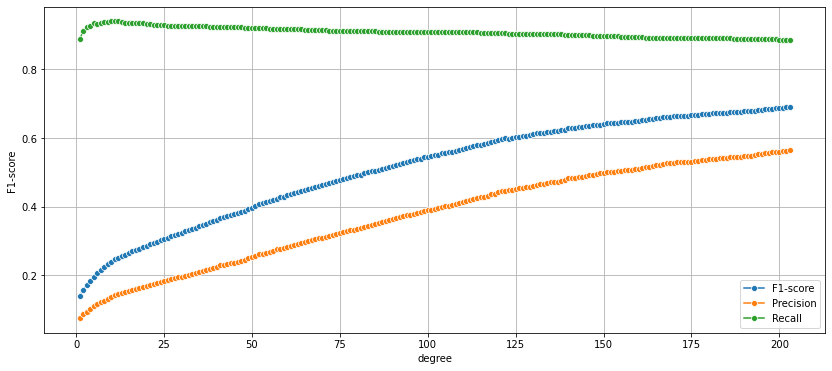

In [4]:
# Line chart
x_axis = 'degree'
y_axis = ['F1-score', 'Precision', 'Recall']
libcirctis.plot_line_chart(df_eval_cv, x_axis, y_axis)